<a href="https://colab.research.google.com/github/noaisr1/Hw4_DeepLearning/blob/main/Hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [12]:
! pip install facenet_pytorch 
! pip install mmcv

In [ ]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


Defining MTCNN Model

In [ ]:
mtcnn = MTCNN(keep_all=True, device=device)

Getting video.mp4 from given github and changing its name for conviniance

In [ ]:
!wget https://github.com/timesler/facenet-pytorch/blob/master/examples/video.mp4?raw=true
!mv /content/video.mp4?raw=true /content/video.mp4


--2021-06-18 12:06:26--  https://github.com/timesler/facenet-pytorch/blob/master/examples/video.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/timesler/facenet-pytorch/raw/master/examples/video.mp4 [following]
--2021-06-18 12:06:26--  https://github.com/timesler/facenet-pytorch/raw/master/examples/video.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/timesler/facenet-pytorch/master/examples/video.mp4 [following]
--2021-06-18 12:06:27--  https://raw.githubusercontent.com/timesler/facenet-pytorch/master/examples/video.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

Run video with MTCNN

In [ ]:
video = mmcv.VideoReader('/content/video.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

In [ ]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)

Tracking frame: 105

In [ ]:
frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))


Creating video which is the same as 'video.mp4' only with face detections inside 

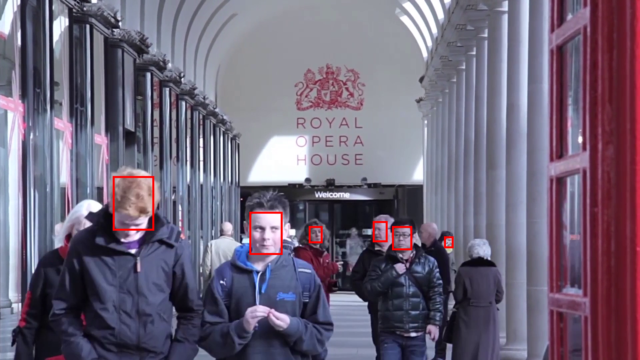

In [ ]:

d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

In [ ]:

dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('video_tracked.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()